<a href="https://colab.research.google.com/github/pedroescobedob/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Pedro_Escobedo_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [0]:
# TODO

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [89]:
# header=None fixes the amount of observations issue.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)
print(df.shape)
df.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [90]:
df.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12',
            'A13','A14','A15','A16']

df.replace('?', np.NaN, inplace=True)
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [91]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [92]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [93]:
df['A2'] = df['A2'].astype(float)
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO

# Exploring data

In [95]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [96]:
df['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

In [97]:
a1_a16 = pd.crosstab(df['A1'], df['A16'])
a1_a16

A16,+,-
A1,,
a,98,112
b,206,262


In [98]:
a2_a16 = pd.crosstab(df['A2'], df['A16'])
a2_a16.head()

A16,+,-
A2,,
13.75,1,0
15.17,0,1
15.75,0,1
15.83,1,1
15.92,0,1


In [99]:
df['A2'].value_counts()
df['A2'].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: A2, dtype: float64

In [100]:
a15_a16 = pd.crosstab(df['A15'], df['A16'])
a15_a16.head()

A16,+,-
A15,,
0.0,113,182
1.0,2,27
2.0,0,9
3.0,1,5
4.0,0,5


In [101]:
df['A15'].value_counts()
df['A15'].describe()

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: A15, dtype: float64

In [102]:
a13_a16 = pd.crosstab(df['A13'], df['A16'])
a13_a16
df['A13'].value_counts()
df['A13'].describe()

count     690
unique      3
top         g
freq      625
Name: A13, dtype: object

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


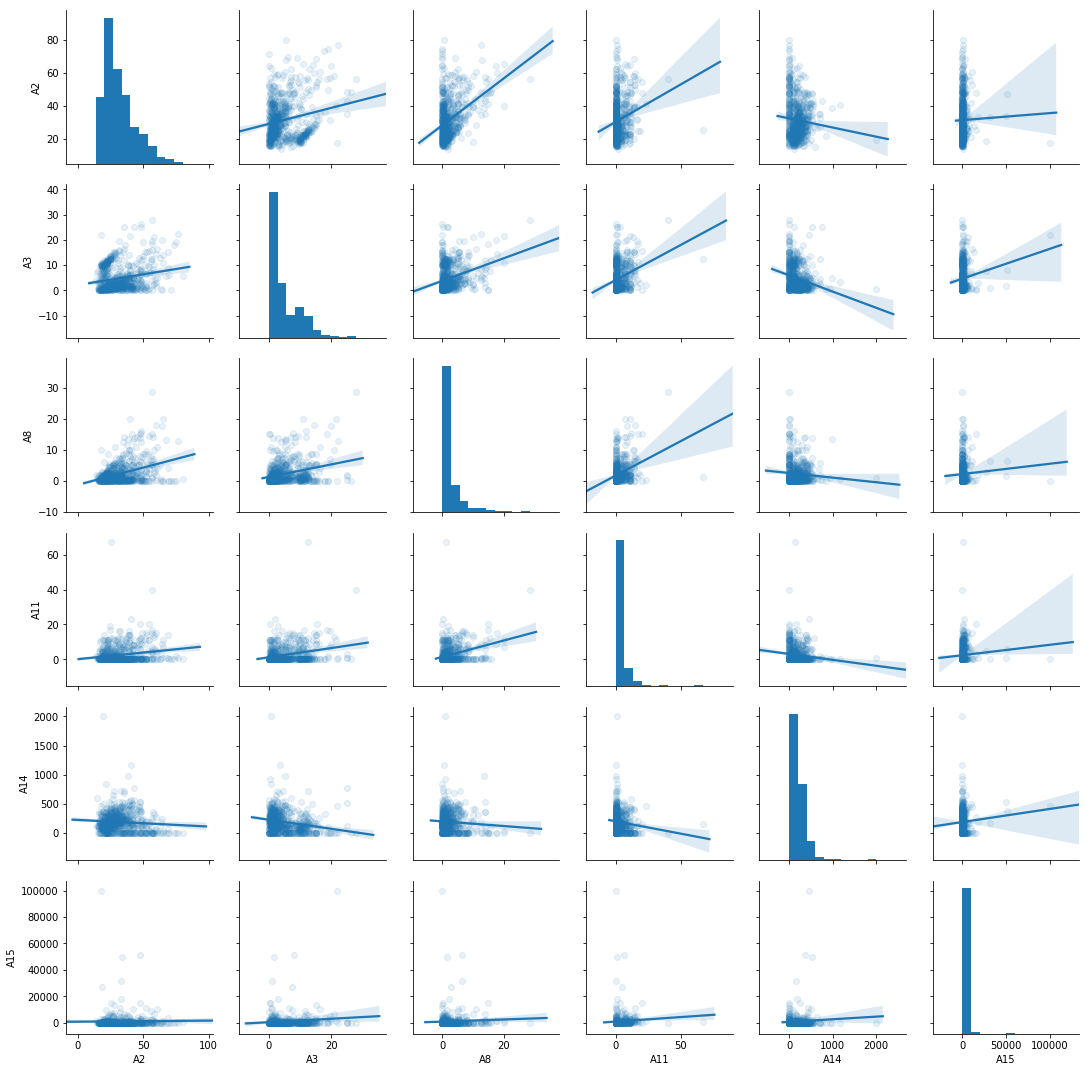

In [103]:
import seaborn as sns
graphs = sns.pairplot(df, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})

In [0]:
approved = df[df['A16'] == '+']
rejected = df[df['A16'] == '-']

In [105]:
approved.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [106]:
rejected.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


#  6 continuous features

In [0]:
a2_approved = approved['A2']
a2_rejected = rejected['A2']
a3_approved = approved['A3']
a3_rejected = rejected['A3']
a8_approved = approved['A8']
a8_rejected = rejected['A8']
a11_approved = approved['A11']
a11_rejected = rejected['A11']
a14_approved = approved['A14']
a14_rejected = rejected['A14']
a15_approved = approved['A15']
a15_rejected = rejected['A15']

In [108]:
a2_approved.describe()

count    305.000000
mean      33.720492
std       12.809641
min       13.750000
25%       23.170000
50%       30.500000
75%       41.330000
max       76.750000
Name: A2, dtype: float64

In [109]:
a2_rejected.describe()

count    373.000000
mean      29.808231
std       10.919291
min       15.170000
25%       22.000000
50%       27.330000
75%       34.830000
max       80.250000
Name: A2, dtype: float64

In [110]:
stats.ttest_ind(a2_approved, a2_rejected, nan_policy='omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [111]:
stats.ttest_ind(a3_approved, a3_rejected, nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

## **Histograms**

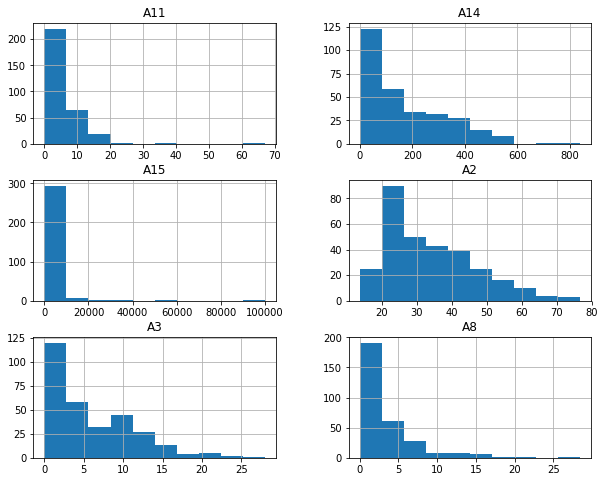

In [112]:
approved.hist(figsize=(10,8))
plt.show()

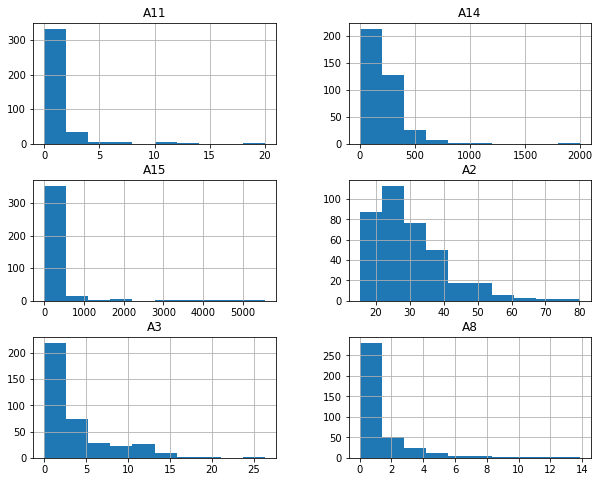

In [113]:
rejected.hist(figsize=(10, 8))
plt.show()

## **Plots**

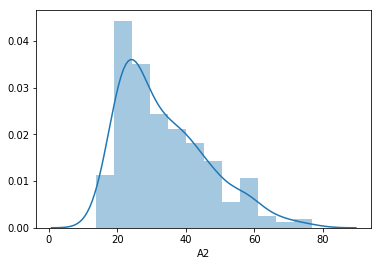

In [114]:
sns.distplot(a2_approved.dropna())
# a2_approved.plot()
# plt.show()

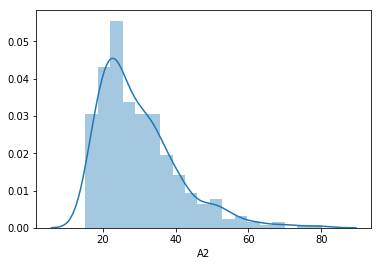

In [115]:
sns.distplot(a2_rejected.dropna())
# a2_rejected.plot()
# plt.show()

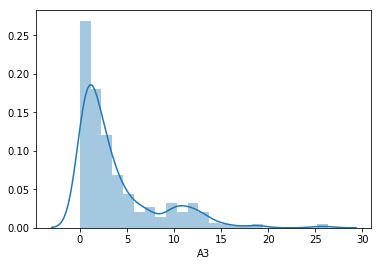

In [116]:
sns.distplot(a3_rejected.dropna())
# a3_rejected.plot()
# plt.show()

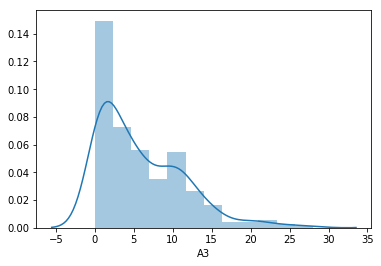

In [117]:
sns.distplot(a3_approved.dropna())
# a3_approved.plot()
# plt.show()

# Chi-squared 

In [118]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
a15_cut = pd.cut(df['A15'], 5)

In [120]:
a15_16 = pd.crosstab(a15_cut, df['A16'])
a15_16

A16,+,-
A15,,
"(-100.0, 20000.0]",302,383
"(20000.0, 40000.0]",2,0
"(40000.0, 60000.0]",2,0
"(80000.0, 100000.0]",1,0


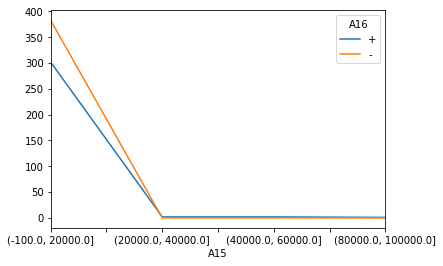

In [121]:
a15_16.plot()

In [122]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(a15_16)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 6.283316293777787
P-value: 0.09861105842405604
Degrees of Freedom: 3
Expected: 
 [[304.77536232 380.22463768]
 [  0.88985507   1.11014493]
 [  0.88985507   1.11014493]
 [  0.44492754   0.55507246]]


In [123]:
p_value = stats.chi2.sf(chi_squared, dof)
p_value

0.09861105842405604

In [124]:
a2_cut = pd.cut(df['A2'], 5)
a2_16 = pd.crosstab(a2_cut, df['A16'] )
a2_16

A16,+,-
A2,,
"(13.684, 27.05]",122,183
"(27.05, 40.35]",99,135
"(40.35, 53.65]",54,42
"(53.65, 66.95]",25,9
"(66.95, 80.25]",5,4


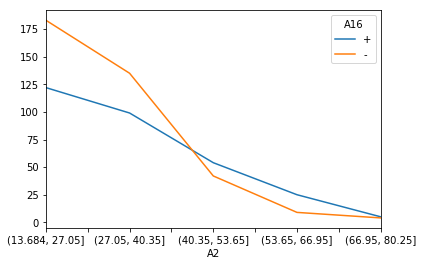

In [125]:
a2_16.plot()

In [126]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(a2_16)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 20.262750124144546
P-value: 0.0004431477337025627
Degrees of Freedom: 4
Expected: 
 [[137.20501475 167.79498525]
 [105.26548673 128.73451327]
 [ 43.18584071  52.81415929]
 [ 15.29498525  18.70501475]
 [  4.04867257   4.95132743]]


In [127]:
p_value2 = stats.chi2.sf(chi_squared, dof)
p_value2

0.0004431477337025627

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

- The first t-test score gave me the 95% confidence level that the mean for A2 with a approved class is higher than than the mean for A2 with a rejected class because of the positive t-statistic.
The second t-test gave me the 95% confidence level that the mean for A3 with a approved class is higher than than the mean for A3 with a rejected class because of the positive t-statistic.

- A15(category) and A16(class label) p-value suggest there is only a 1.3808333653917482e-05 chance that a Chi-squared score of 25.232020957107316 or larger could be reached. 
A2(category) and A16(class label) p-value suggest there is only a 0.0004431477337025627 chance that a Chi-squared score of 20.262750124144546 or larger could be reached.

- The most challenging part of this sprint challenge was just the statistics in general and interpreting the Chi-squared. I had to review before the challenge and google a lot while doing the challenge.

